## Train-Test Split Analysis

One final analysis would be to check how would the data distribution look like once we have split the dataset.

According to the paper, it was a 70/30 split

In [1]:
# Import basic libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

In [2]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH_TWO_P")
dataset = pd.read_csv(dataset_path)
dataset.head()

,Gender,Age,DIAGNOSIS,MMSE,Hip ASM,Hip Contrast,Hip Correlation,Hip Variance,Hip Sum Average,Hip Sum Variance,...,ERC CONTRAST,ERC CORRELATION,ERC VARIANCE,ERC SUM AVERAGE,ERC SUM VARIANCE,ERC ENTROPY,ERC CLUSTER SHADE,ERCs_thicknessbaseline,ERCsVolumebaseline,TOTAL_HIPPOCAMPUS_VOLUME
0,0,64.585900,0,27.0,0.377501,128.715226,0.422342,115.630163,15.181458,333.805425,...,286.270009,0.289728,206.373786,44.577974,539.225137,3.320292,22924.739100,3.3445,2251,7338.2
1,0,68.076660,2,20.0,0.657212,51.830551,0.557254,84.225204,8.530596,285.070266,...,282.873623,0.310507,206.276556,39.697933,542.232602,2.864138,18182.687670,2.9605,2924,5438.6
2,1,76.221760,1,28.0,0.520032,86.558742,0.594543,123.662642,13.400504,408.091827,...,244.274039,0.370189,201.216707,46.081559,560.592790,3.415186,28045.350990,3.3145,4042,8434.4
3,0,73.221085,0,30.0,0.396133,60.731686,0.596733,122.546512,15.571183,429.454361,...,226.713342,0.517430,232.983710,30.461877,705.221498,2.937422,1196.160472,3.1505,3485,7476.2
4,0,45.872690,0,30.0,0.404800,108.808540,0.520363,98.065558,13.483247,283.453692,...,202.074647,0.354851,169.528802,50.680275,476.040561,3.017047,47743.254120,3.5420,3964,8021.8


In [3]:
# Split dataset
from sklearn.model_selection import train_test_split

copy_dataset = dataset.copy()

X = copy_dataset.drop(columns = ["DIAGNOSIS"])
y = copy_dataset["DIAGNOSIS"]

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X, 
                                                    y, 
                                                    test_size = .30, 
                                                    random_state = 42,
)

X_train_vis.shape, X_test_vis.shape, y_train_vis.shape, y_test_vis.shape

((508, 22), (219, 22), (508,), (219,))

### Input feature analysis

Lets see how our data looks now after we split it

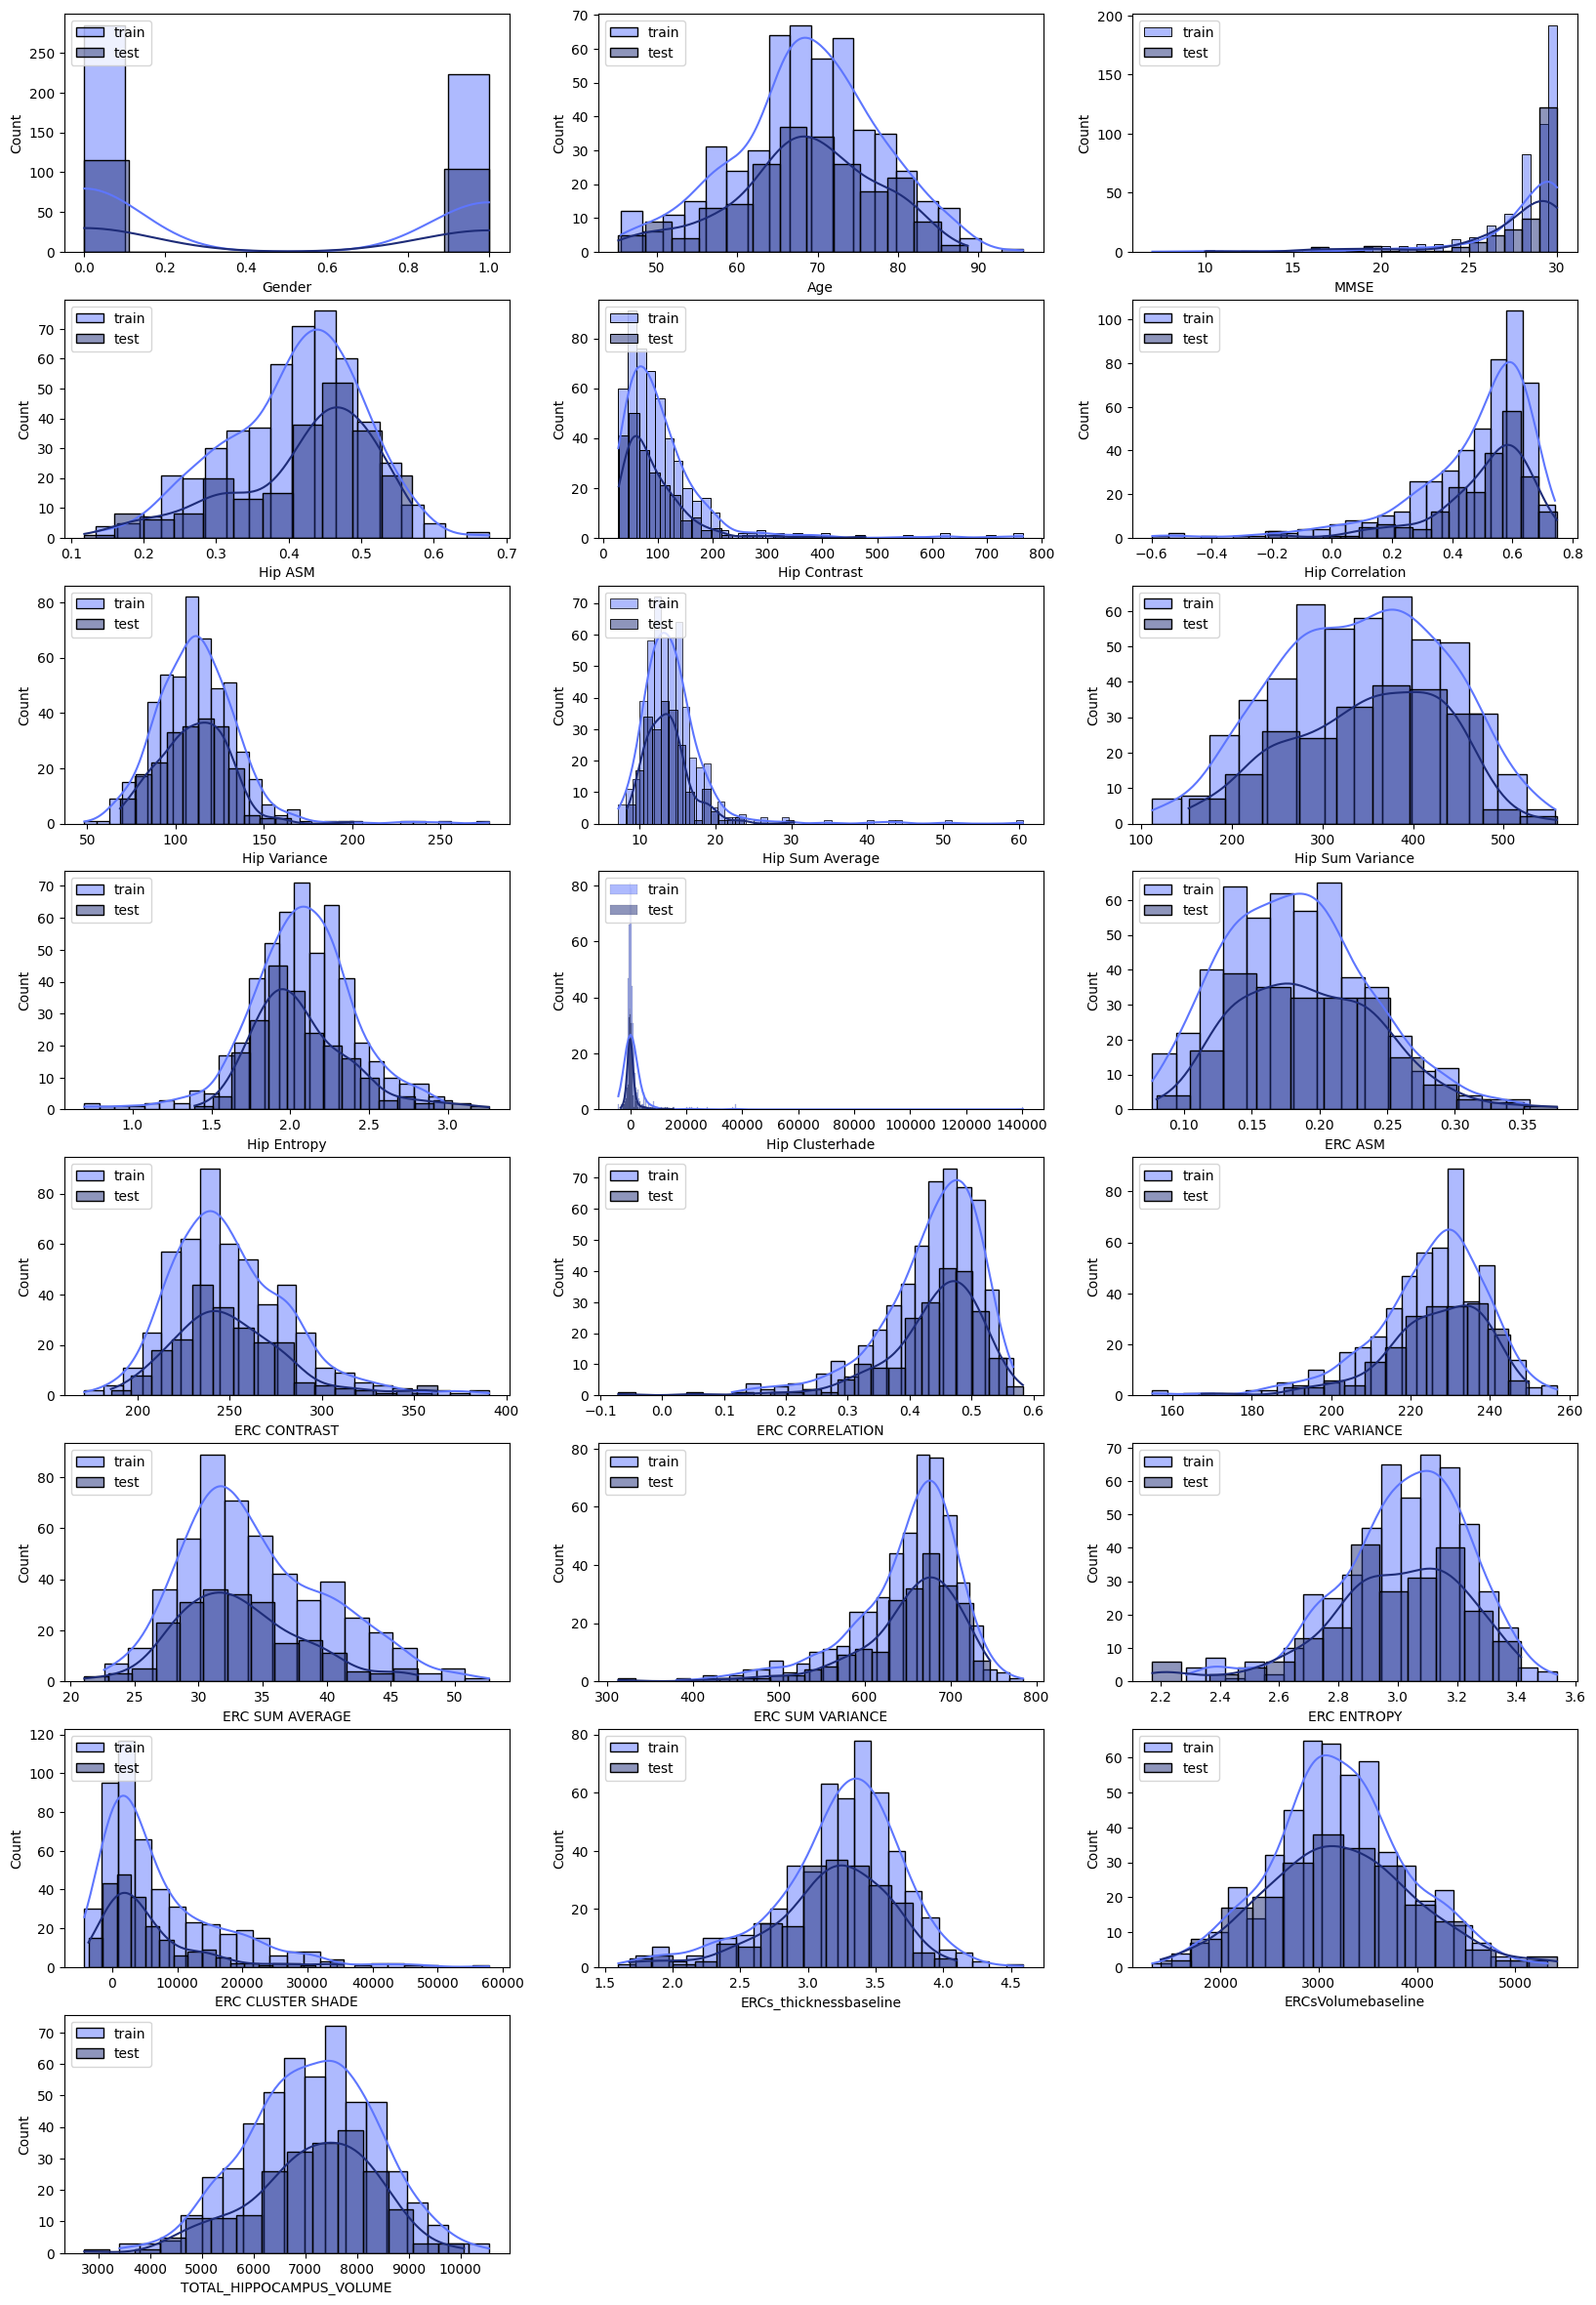

In [4]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_vis.columns)):
    plt.subplot(12,3,i+1)
    sns.histplot(X_train_vis[X_train_vis.columns[i]], color="#5e76fe", kde = True, label="train")
    plt.legend(loc="upper left")


    plt.subplot(12,3,i+1)
    sns.histplot(X_test_vis[X_test_vis.columns[i]], color= "#1e2c78", kde = True, label="test")
    plt.legend(loc="upper left")


It appears that some observations are included in the test set while other values are excluded in the training set. 

The last graph is a good example - notice from left to right. 

Lets have a closer look

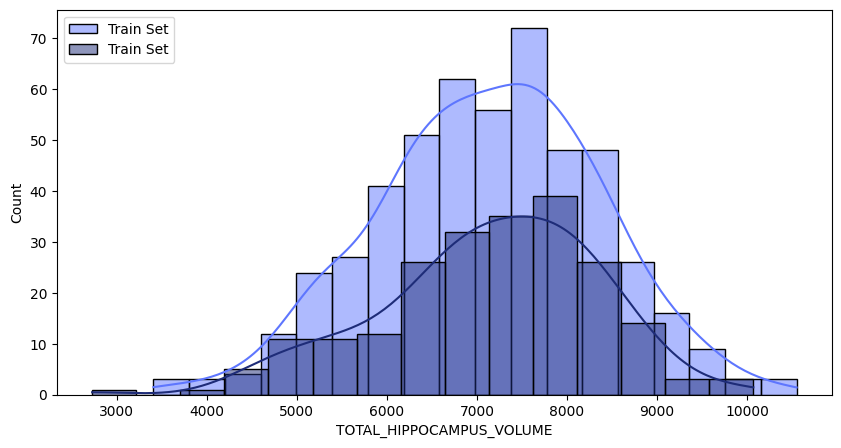

In [5]:
# Plot histogram of training/test set
plt.figure(figsize=(10, 5))

sns.histplot(X_train_vis["TOTAL_HIPPOCAMPUS_VOLUME"], color="#5e76fe", kde=True, label='Train Set', alpha=0.5)
sns.histplot(X_test_vis["TOTAL_HIPPOCAMPUS_VOLUME"], color="#1e2c78", kde=True, label='Train Set', alpha=0.5)
plt.legend(loc="upper left")

**This could be one of the few reasons why some of the models will underperform later on.**

Now lets check for the target split

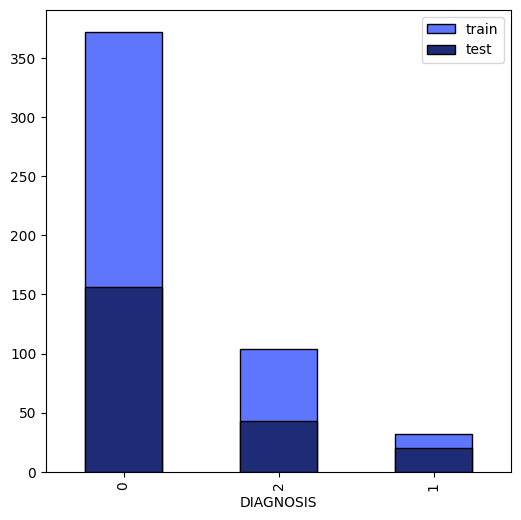

In [6]:
# Plot the target of training/test set using bar
plt.figure(figsize = (6,6))

y_train_vis.value_counts().plot(kind = "bar", 
                            color = "#5e76fe",
                            edgecolor = "black",
                            label="train",
)

y_test_vis.value_counts().plot(kind = "bar", 
                            color = "#1e2c78",
                            edgecolor = "black",
                            label="test",
)

plt.legend(loc="upper right")

In [7]:
y_train_vis.value_counts()

DIAGNOSIS
0    372
2    104
1     32
Name: count, dtype: int64

In [8]:
y_test_vis.value_counts()

DIAGNOSIS
0    156
2     43
1     20
Name: count, dtype: int64

### Removing null values

In [9]:
null_dataset = dataset.dropna()

In [10]:
X_train_vis_null, X_test_vis_null, y_train_vis_null, y_test_vis_null = train_test_split(null_dataset.drop(columns=["DIAGNOSIS"]), 
                                                    null_dataset["DIAGNOSIS"], 
                                                    test_size = .30, 
                                                    random_state = 42,
)

X_train_vis_null.shape, X_test_vis_null.shape, y_train_vis_null.shape, y_test_vis_null.shape

((500, 22), (215, 22), (500,), (215,))

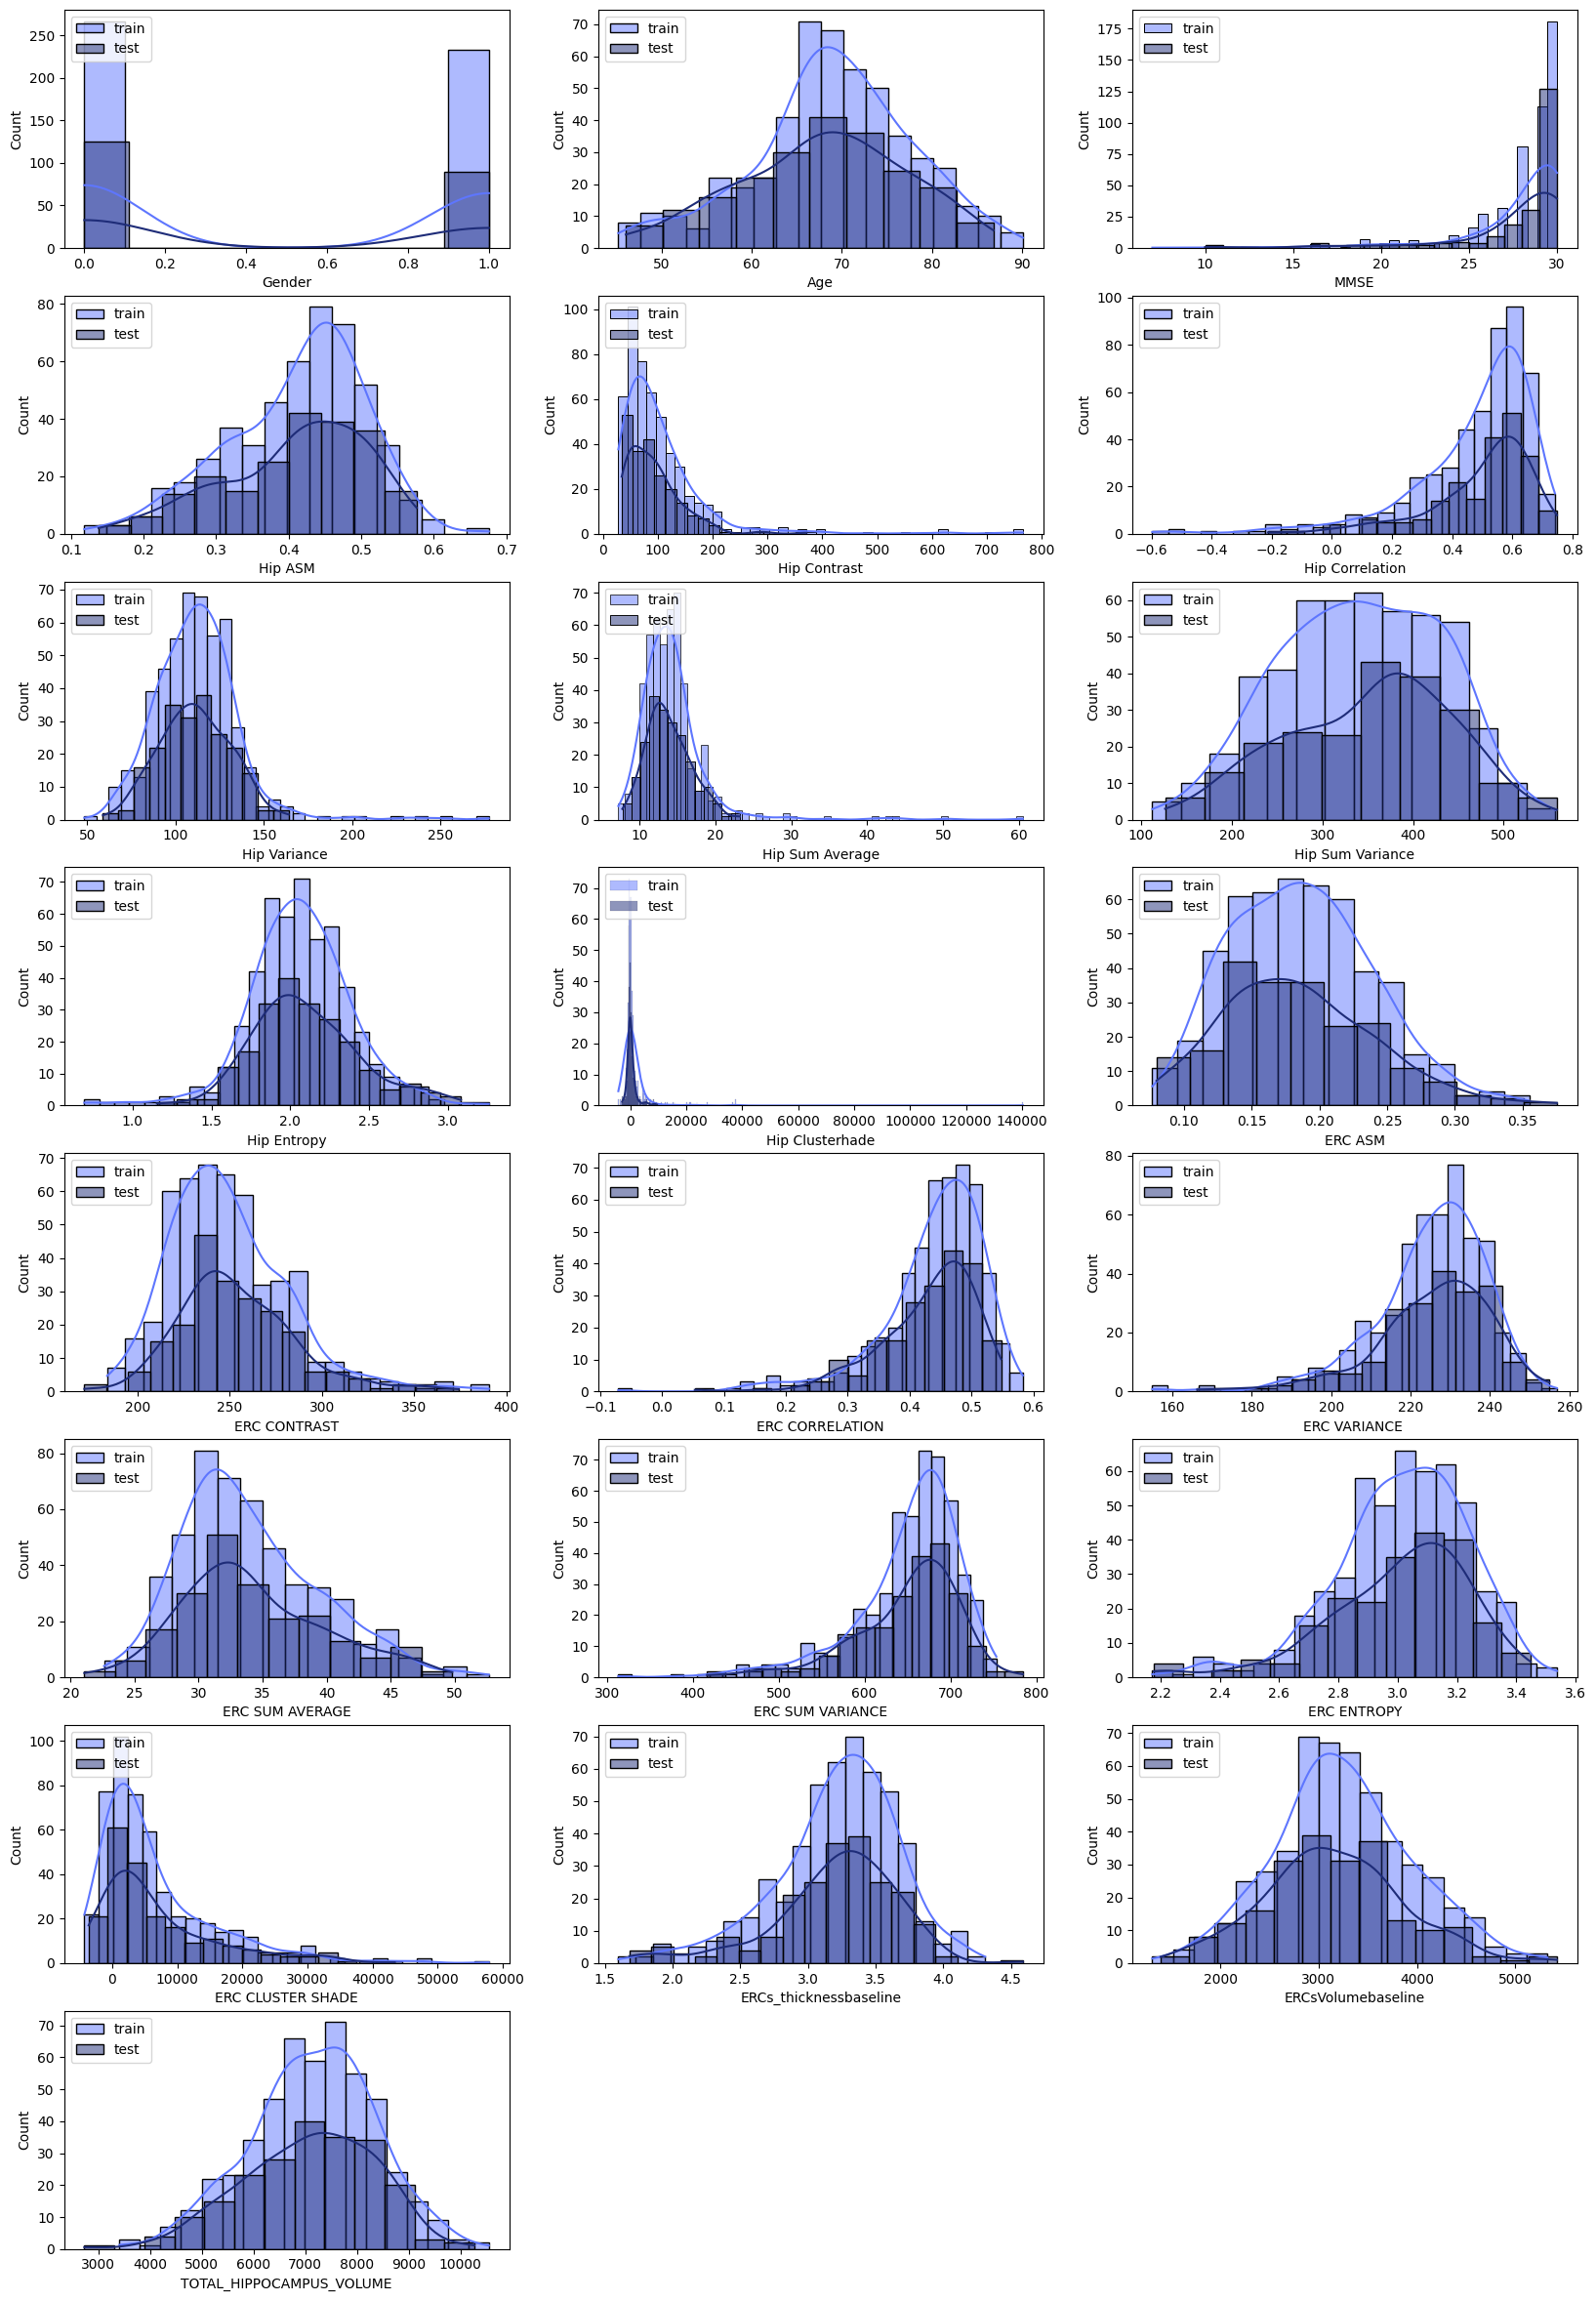

In [11]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_vis_null.columns)):
    plt.subplot(12,3,i+1)
    sns.histplot(X_train_vis_null[X_train_vis_null.columns[i]], color="#5e76fe", kde = True, label="train")
    plt.legend(loc="upper left")


    plt.subplot(12,3,i+1)
    sns.histplot(X_test_vis_null[X_test_vis_null.columns[i]], color= "#1e2c78", kde = True, label="test")
    plt.legend(loc="upper left")


In [12]:
y_train_vis_null.value_counts()

DIAGNOSIS
0    358
2    107
1     35
Name: count, dtype: int64

In [13]:
y_test_vis_null.value_counts()

DIAGNOSIS
0    162
2     37
1     16
Name: count, dtype: int64

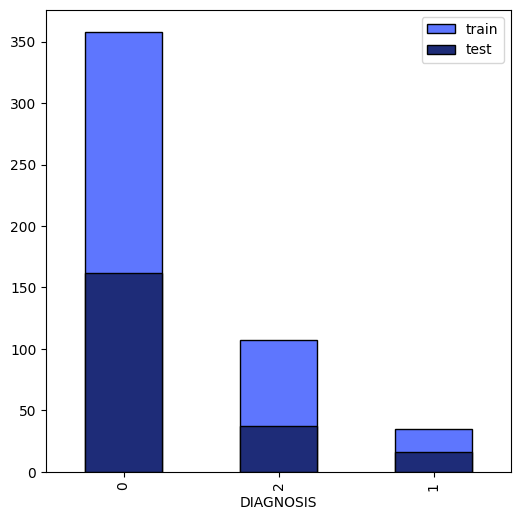

In [14]:
# Plot the target of training/test set using bar
plt.figure(figsize = (6,6))

y_train_vis_null.value_counts().plot(kind = "bar", 
                            color = "#5e76fe",
                            edgecolor = "black",
                            label="train",
)

y_test_vis_null.value_counts().plot(kind = "bar", 
                            color = "#1e2c78",
                            edgecolor = "black",
                            label="test",
)

plt.legend(loc="upper right")